In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [338]:
df = pd.read_csv('nyc-rolling-sales.csv', encoding='utf-8')
df_old_size = df.shape[0]

In [339]:
df.isnull().any()

Unnamed: 0                        False
BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BLOCK                             False
LOT                               False
EASE-MENT                         False
BUILDING CLASS AT PRESENT         False
ADDRESS                           False
APARTMENT NUMBER                  False
ZIP CODE                          False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                 False
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
dtype: bool

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [341]:
df['NEIGHBORHOOD'].unique()

array(['ALPHABET CITY', 'CHELSEA', 'CHINATOWN', 'CIVIC CENTER', 'CLINTON',
       'EAST VILLAGE', 'FASHION', 'FINANCIAL', 'FLATIRON', 'GRAMERCY',
       'GREENWICH VILLAGE-CENTRAL', 'GREENWICH VILLAGE-WEST',
       'HARLEM-CENTRAL', 'HARLEM-EAST', 'HARLEM-UPPER', 'HARLEM-WEST',
       'INWOOD', 'JAVITS CENTER', 'KIPS BAY', 'LITTLE ITALY',
       'LOWER EAST SIDE', 'MANHATTAN VALLEY', 'MIDTOWN CBD',
       'MIDTOWN EAST', 'MIDTOWN WEST', 'MORNINGSIDE HEIGHTS',
       'MURRAY HILL', 'ROOSEVELT ISLAND', 'SOHO', 'SOUTHBRIDGE',
       'TRIBECA', 'UPPER EAST SIDE (59-79)', 'UPPER EAST SIDE (79-96)',
       'UPPER EAST SIDE (96-110)', 'UPPER WEST SIDE (59-79)',
       'UPPER WEST SIDE (79-96)', 'UPPER WEST SIDE (96-116)',
       'WASHINGTON HEIGHTS LOWER', 'WASHINGTON HEIGHTS UPPER', 'BATHGATE',
       'BAYCHESTER', 'BEDFORD PARK/NORWOOD', 'BELMONT', 'BRONX PARK',
       'BRONXDALE', 'CASTLE HILL/UNIONPORT', 'CITY ISLAND',
       'CITY ISLAND-PELHAM STRIP', 'CO-OP CITY', 'COUNTRY CLUB',
     

In [342]:
df = df[df['NEIGHBORHOOD'] != ' ']
df['NEIGHBORHOOD'] = pd.factorize(df['NEIGHBORHOOD'])[0]

In [343]:
df['BUILDING CLASS CATEGORY'].unique()

array(['07 RENTALS - WALKUP APARTMENTS             ',
       '08 RENTALS - ELEVATOR APARTMENTS           ',
       '09 COOPS - WALKUP APARTMENTS               ',
       '10 COOPS - ELEVATOR APARTMENTS             ',
       '11A CONDO-RENTALS                           ',
       '12 CONDOS - WALKUP APARTMENTS              ',
       '13 CONDOS - ELEVATOR APARTMENTS            ',
       '14 RENTALS - 4-10 UNIT                     ',
       '15 CONDOS - 2-10 UNIT RESIDENTIAL          ',
       '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT ',
       '17 CONDO COOPS                             ',
       '22 STORE BUILDINGS                         ',
       '37 RELIGIOUS FACILITIES                    ',
       '42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC  ',
       '46 CONDO STORE BUILDINGS                   ',
       '47 CONDO NON-BUSINESS STORAGE              ',
       '01 ONE FAMILY DWELLINGS                    ',
       '02 TWO FAMILY DWELLINGS                    ',
       '03 THREE FAMILY DWE

In [344]:
df = df[df['BUILDING CLASS CATEGORY'] != ' ']
df['BUILDING CLASS CATEGORY'] = pd.factorize(df['BUILDING CLASS CATEGORY'])[0]

In [345]:
df['TAX CLASS AT PRESENT'].unique()

array(['2A', '2', '2B', '2C', ' ', '4', '1', '1C', '3', '1A', '1B'],
      dtype=object)

In [346]:
df = df[df['TAX CLASS AT PRESENT'] != ' ']
#df['TAX CLASS AT PRESENT'] = pd.factorize(df['TAX CLASS AT PRESENT'])[0]

def simplify(f):
    if '1' in f:
        return 1
    if '2' in f:
        return 2
    if '3' in f:
        return 3
    if '4' in f:
        return 4

df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].apply(simplify)

In [347]:
df['BUILDING CLASS AT PRESENT'].unique()

array(['C2', 'C7', 'C4', 'D5', 'D9', 'D7', 'D1', 'C6', 'D0', 'D4', 'RR',
       'R2', 'R4', 'S3', 'S4', 'S5', 'R1', 'R8', 'R9', 'K4', 'M9', 'M3',
       'RK', 'RS', 'A9', 'A4', 'B3', 'B1', 'S2', 'C0', 'R6', 'C5', 'C3',
       'C1', 'D6', 'S9', 'O2', 'O1', 'O3', 'O5', 'O6', 'K1', 'K2', 'L9',
       'L8', 'L1', 'H1', 'H8', 'H3', 'R5', 'G6', 'P7', 'M1', 'N2', 'RB',
       'RG', 'RT', 'K9', 'V1', 'GW', 'G2', 'I7', 'M4', 'Z9', 'B9', 'D3',
       'G9', 'I9', 'U6', 'O4', 'L3', 'H2', 'E1', 'Z3', 'RW', 'C9', 'J5',
       'N9', 'S1', 'A5', 'J8', 'B2', 'C8', 'F5', 'Q1', 'G7', 'G5', 'G4',
       'P2', 'Q9', 'Y1', 'RA', 'RP', 'O8', 'HR', 'G1', 'E7', 'I5', 'R3',
       'I4', 'H9', 'RH', 'D8', 'HB', 'J4', 'W2', 'P9', 'A7', 'D2', 'S0',
       'O7', 'O9', 'W3', 'HS', 'H6', 'J9', 'R0', 'HH', 'W8', 'W6', 'A1',
       'K5', 'F1', 'V9', 'A2', 'V0', 'G0', 'F4', 'E9', 'I3', 'W4', 'V3',
       'I1', 'A6', 'Q8', 'A3', 'Z0', 'W1', 'U1', 'F2', 'F9', 'GU', 'I6',
       'G8', 'P5', 'Y3', 'W9', 'M2', 'G3', 'V6', 'K

In [348]:
df = df[df['BUILDING CLASS AT PRESENT'] != ' ']
df['BUILDING CLASS AT PRESENT'] = pd.factorize(df['BUILDING CLASS AT PRESENT'])[0]

In [349]:
df['EASE-MENT'].unique()

array([' '], dtype=object)

In [350]:
del df["EASE-MENT"]

In [351]:
df['ADDRESS'].unique()

array(['153 AVENUE B', '234 EAST 4TH   STREET', '197 EAST 3RD   STREET',
       ..., '49 PITNEY AVENUE', '2730 ARTHUR KILL ROAD',
       '155 CLAY PIT ROAD'], dtype=object)

In [352]:
def clear(s):
    ns = s.split(' ', 1)
    l = len(ns)
    return ns[l - 1]

df['ADDRESS'] = df['ADDRESS'].apply(clear)

In [353]:
df = df[df['ADDRESS'] != ' ']
df['ADDRESS'] = pd.factorize(df['ADDRESS'])[0]

In [354]:
df['APARTMENT NUMBER'].unique()

array([' ', 'RES', 'UNIT1', ..., '115', 'MS-B', '363'], dtype=object)

In [355]:
del df['APARTMENT NUMBER']

In [356]:
df['LAND SQUARE FEET'].unique()

array(['1633', '4616', '2212', ..., '11088', '208033', '10796'],
      dtype=object)

In [357]:
col = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
allCs = col.size
nullCs = col[col.isnull()].size
print('count', allCs, sep=': ') 
print('nulls count', nullCs, sep=': ')
print('percent of nulls', nullCs/allCs*100, sep=': ')

count: 83810
nulls count: 25866
percent of nulls: 30.862665553036628


In [358]:
del df['LAND SQUARE FEET']

In [359]:
df['GROSS SQUARE FEET'].unique()

array(['6440', '18690', '7803', ..., '977', '2683', '64117'], dtype=object)

In [360]:
col = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
allCs = col.size
nullCs = col[col.isnull()].size
print('count', allCs, sep=': ') 
print('nulls count', nullCs, sep=': ')
print('percent of nulls', nullCs/allCs*100, sep=': ')

count: 83810
nulls count: 27226
percent of nulls: 32.48538360577496


In [361]:
del df['GROSS SQUARE FEET']

In [362]:
df['BUILDING CLASS AT TIME OF SALE'].unique()

array(['C2', 'C7', 'C4', 'D5', 'D9', 'D7', 'D1', 'C6', 'D0', 'D4', 'RR',
       'R2', 'R4', 'S3', 'S4', 'S5', 'R1', 'R8', 'R9', 'K4', 'M9', 'M3',
       'RK', 'RS', 'A9', 'A4', 'B3', 'B1', 'S2', 'C0', 'R6', 'C5', 'C3',
       'C1', 'D6', 'S9', 'O2', 'O1', 'O3', 'O5', 'O6', 'K1', 'K2', 'L9',
       'L8', 'L1', 'H1', 'H8', 'H3', 'R5', 'G9', 'G6', 'P7', 'M1', 'N2',
       'RB', 'RG', 'RT', 'K9', 'V1', 'GW', 'G2', 'I7', 'M4', 'Z9', 'B9',
       'D3', 'I9', 'U6', 'O4', 'L3', 'H2', 'E1', 'Z3', 'Q1', 'RW', 'C9',
       'J5', 'N9', 'S1', 'A5', 'J8', 'B2', 'C8', 'F5', 'G7', 'G5', 'G4',
       'P2', 'Q9', 'Y1', 'RA', 'RP', 'O8', 'HR', 'G1', 'E7', 'I5', 'R3',
       'I4', 'H9', 'RH', 'D8', 'HB', 'J4', 'W2', 'P9', 'A7', 'D2', 'S0',
       'O7', 'O9', 'W3', 'HS', 'H6', 'J9', 'R0', 'HH', 'W8', 'W6', 'A1',
       'K5', 'F1', 'V9', 'A2', 'V0', 'G0', 'F4', 'E9', 'I3', 'W4', 'V3',
       'I1', 'A6', 'Q8', 'A3', 'Z0', 'W1', 'U1', 'F2', 'F9', 'GU', 'I6',
       'G8', 'P5', 'Y3', 'W9', 'M2', 'G3', 'V6', 'K

In [363]:
df['BUILDING CLASS AT TIME OF SALE'] = pd.factorize(df['BUILDING CLASS AT TIME OF SALE'])[0]

In [364]:
df['SALE PRICE'].unique()

array(['6625000', ' -  ', '3936272', ..., '408092', '11693337', '69300'],
      dtype=object)

In [365]:
col = pd.to_numeric(df['SALE PRICE'], errors='coerce')
allCs = col.size
nullCs = col[col.isnull()].size
print('count', allCs, sep=': ') 
print('nulls count', nullCs, sep=': ')
print('percent of nulls', nullCs/allCs*100, sep=': ')

count: 83810
nulls count: 14496
percent of nulls: 17.296265362128622


In [366]:
df['SALE PRICE'] = col
df = df[pd.notnull(df['SALE PRICE'])]
df = df[df['SALE PRICE'] != 0]

In [367]:
df['SALE PRICE'].unique()

array([ 6625000.,  3936272.,  8000000., ...,   408092., 11693337.,
          69300.])

array([[<Axes: title={'center': 'SALE PRICE'}>]], dtype=object)

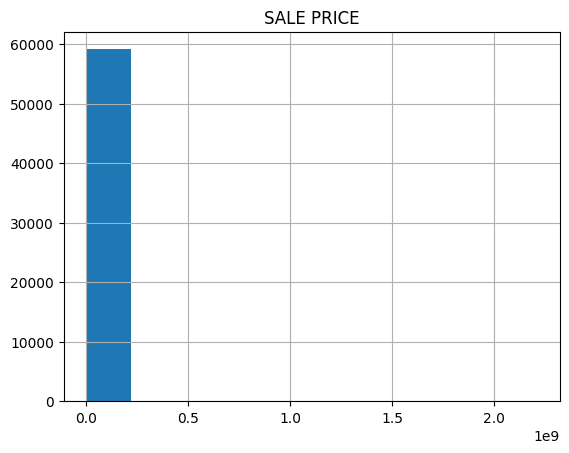

In [368]:
df.hist(['SALE PRICE'])

array([[<Axes: title={'center': 'SALE PRICE'}>]], dtype=object)

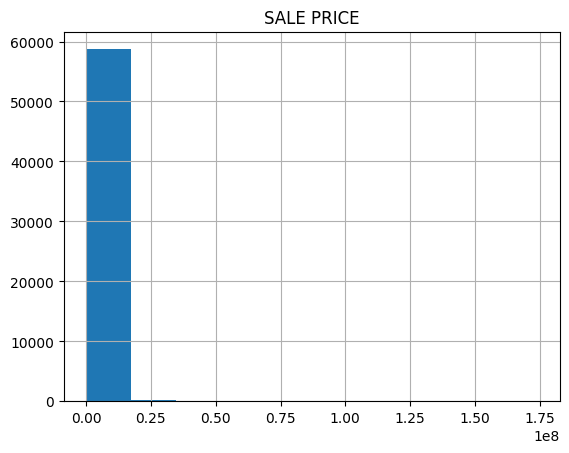

In [369]:
df = df[df['SALE PRICE'] < 1.8 * 10**8]
df.hist(['SALE PRICE'])

In [370]:
df['SALE DATE'].unique()

array(['2017-07-19 00:00:00', '2016-09-23 00:00:00',
       '2016-11-17 00:00:00', '2016-11-07 00:00:00',
       '2016-10-17 00:00:00', '2016-09-06 00:00:00',
       '2017-03-10 00:00:00', '2017-04-28 00:00:00',
       '2017-06-09 00:00:00', '2017-07-14 00:00:00',
       '2017-03-16 00:00:00', '2016-09-01 00:00:00',
       '2017-08-17 00:00:00', '2017-08-30 00:00:00',
       '2017-06-21 00:00:00', '2017-01-30 00:00:00',
       '2017-07-07 00:00:00', '2017-08-04 00:00:00',
       '2017-01-09 00:00:00', '2017-04-18 00:00:00',
       '2017-08-28 00:00:00', '2017-05-10 00:00:00',
       '2016-12-02 00:00:00', '2017-01-31 00:00:00',
       '2017-06-28 00:00:00', '2017-08-24 00:00:00',
       '2017-06-27 00:00:00', '2017-03-17 00:00:00',
       '2017-06-14 00:00:00', '2017-01-17 00:00:00',
       '2017-01-11 00:00:00', '2017-04-21 00:00:00',
       '2017-06-29 00:00:00', '2016-10-05 00:00:00',
       '2017-02-02 00:00:00', '2017-04-13 00:00:00',
       '2017-06-06 00:00:00', '2017-07-17 00:0

In [371]:
"""
col = pd.to_datetime(df['SALE DATE'], errors='coerce')
allCs = col.size
nullCs = col[col.isnull()].size
print('count', allCs, sep=': ') 
print('nulls count', nullCs, sep=': ')
print('percent of nulls', nullCs/allCs*100, sep=': ')
"""

"\ncol = pd.to_datetime(df['SALE DATE'], errors='coerce')\nallCs = col.size\nnullCs = col[col.isnull()].size\nprint('count', allCs, sep=': ') \nprint('nulls count', nullCs, sep=': ')\nprint('percent of nulls', nullCs/allCs*100, sep=': ')\n"

In [372]:
"""
from datetime import date
from datetime import datetime
def simplify(f):
    return (date.today() - datetime.strptime(f, "%Y-%m-%d").date()).days

df['SALE DATE'] = col.astype('string').apply(simplify)
df = df[pd.notnull(df['SALE DATE'])]
"""

del df['SALE DATE']

In [373]:
df_size = df.shape[0]
print('rows removed', df_old_size - df_size, sep=': ')
print('rows now', df_size, sep=': ')

rows removed: 25397
rows now: 59151


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59151 entries, 0 to 84547
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      59151 non-null  int64  
 1   BOROUGH                         59151 non-null  int64  
 2   NEIGHBORHOOD                    59151 non-null  int64  
 3   BUILDING CLASS CATEGORY         59151 non-null  int64  
 4   TAX CLASS AT PRESENT            59151 non-null  int64  
 5   BLOCK                           59151 non-null  int64  
 6   LOT                             59151 non-null  int64  
 7   BUILDING CLASS AT PRESENT       59151 non-null  int64  
 8   ADDRESS                         59151 non-null  int64  
 9   ZIP CODE                        59151 non-null  int64  
 10  RESIDENTIAL UNITS               59151 non-null  int64  
 11  COMMERCIAL UNITS                59151 non-null  int64  
 12  TOTAL UNITS                     

In [375]:
x = df.loc[:, df.columns != 'SALE PRICE']
y = df['SALE PRICE']
train_points, test_points, train_values, test_values = train_test_split(x, y, random_state=104, test_size=0.1, shuffle=False, stratify=None)

In [376]:
rf_model = ensemble.RandomForestRegressor(n_estimators=100)
rf_model.fit(train_points, train_values)
test_predict_rf = rf_model.predict(test_points)
print(mean_absolute_error(test_values, test_predict_rf))

850976.1353803246


In [377]:
x = df.loc[:, df.columns != 'SALE PRICE']
y = df['SALE PRICE']
train_points, test_points, train_values, test_values = train_test_split(x, y, random_state=104, test_size=0.23, shuffle=False, stratify=None)

In [378]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 13)
xg_reg.fit(train_points, train_values)
xgb_predict = xg_reg.predict(test_points)
print(mean_absolute_error(test_values, xgb_predict))

400453.93963156926
